# Bussiness Objective 

- ###  Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


------------------------------------------------------------
- Salary hike - Build a prediction model for salary hike   
------------------------------------------------------------

In [1]:
# importing the libraries 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
# loading the data 

df = pd.read_csv('https://raw.githubusercontent.com/SandipMohane/Assignments/main/Assignment_04_Simple%20Linear%20Regression/Dataset/delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Descriptive Statistics 

df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
# check for duplicated 

df.duplicated().sum()

0

In [6]:
#check for nulls 

df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
# info about the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Visualization 


In [8]:
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (4,2)
plt.rcParams['figure.dpi'] = 100

In [9]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

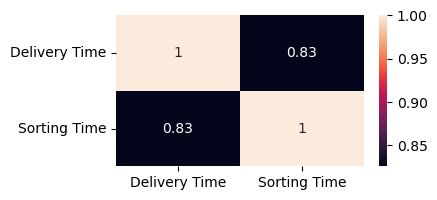

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
# check for the outliers 

Text(0.5, 1.0, 'Boxplot for the Sorting Time')

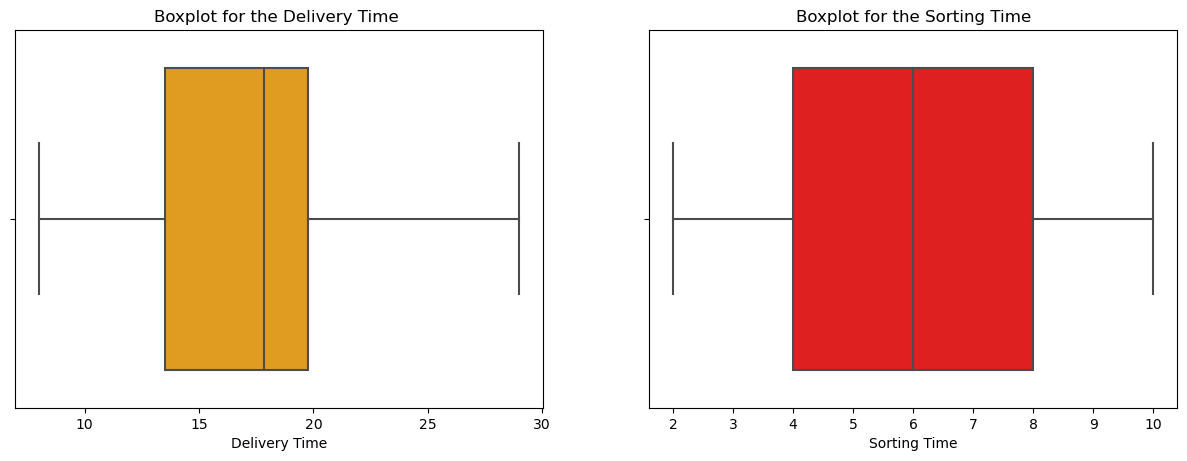

In [12]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle('')

sns.boxplot(ax=axes[0],x=df['Delivery Time'],color='Orange')
axes[0].set_title('Boxplot for the Delivery Time ')

sns.boxplot(ax=axes[1],x=df['Sorting Time'],color='red')
axes[1].set_title('Boxplot for the Sorting Time')


<AxesSubplot:>

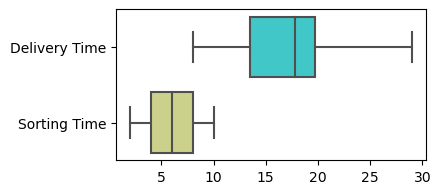

In [13]:
sns.boxplot(data=df,orient='h',palette='rainbow')

### As we seen in the above visualiztion there is no outlier 

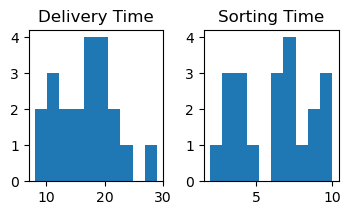

In [14]:
df.hist(grid=False)
plt.show()

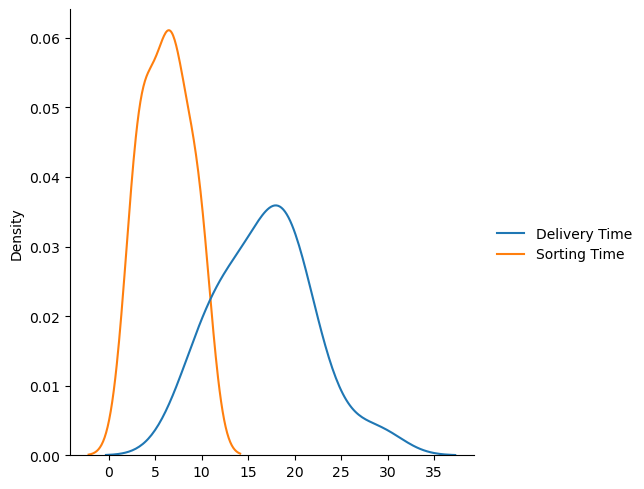

In [15]:
sns.displot(data=df,kind="kde")

as we see the data not followed the normal distibution that is why we check the the skewness and 
kurtosis and going to create a normal distibution of data 

In [16]:
df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [17]:
df.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [18]:
#importing necessary libraries
import scipy.stats as stats
import pylab

#function to return plots for the feature
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

### Logarithmic Transformation – This will convert the Delivery time  and Sorting time   value to its log value i.e log(Delivery Time),log(Sorting time)

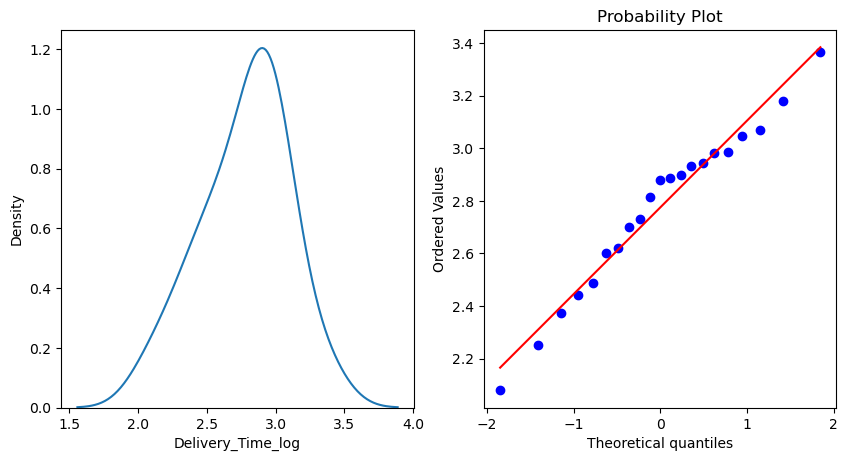

In [19]:
#Logarithmic Transformation – This will convert the Price value to its log value i.e log(Price)
#performing logarithmic transformation on the feature
df['Delivery_Time_log']=np.log(df['Delivery Time'])
#plotting to check the transformation
normality(df,'Delivery_Time_log')

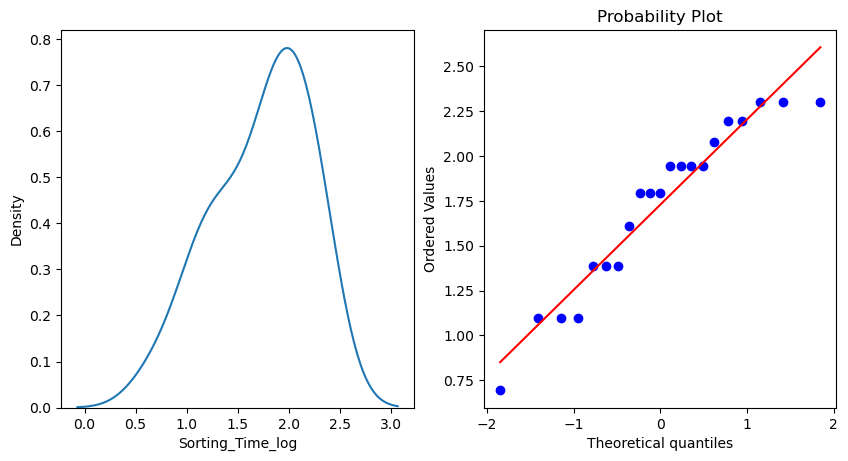

In [20]:
#performing logarithmic transformation on the feature
df['Sorting_Time_log']=np.log(df['Sorting Time'])
#plotting to check the transformation
normality(df,'Sorting_Time_log')

### Square Root Transformation – This transformation will take the square root of the P columns i.e sqrt(Delivery Time),sqrt(Sorting time)

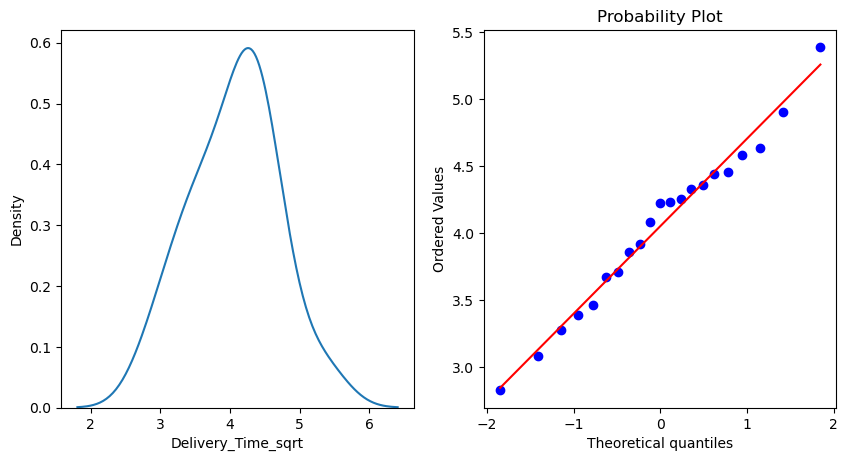

In [21]:

df['Delivery_Time_sqrt']=np.sqrt(df['Delivery Time'])
normality(df,'Delivery_Time_sqrt')

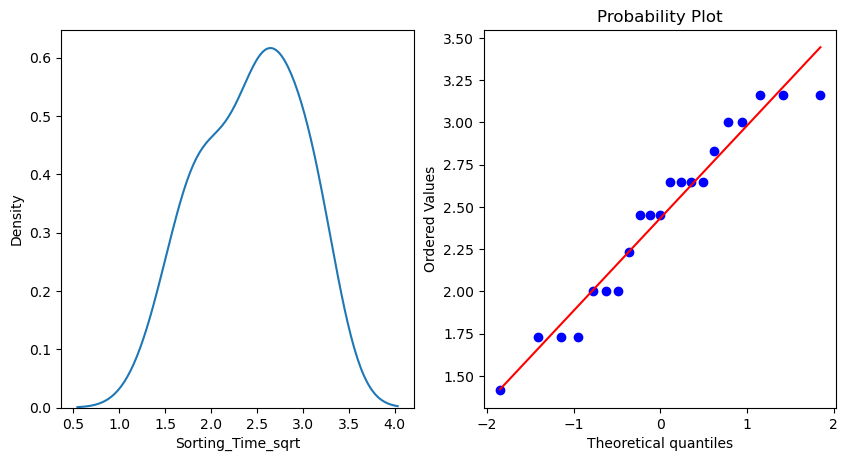

In [22]:
df['Sorting_Time_sqrt']=np.sqrt(df['Sorting Time'])
normality(df,'Sorting_Time_sqrt')

In [23]:
df.head()

,Delivery Time,Sorting Time,Delivery_Time_log,Sorting_Time_log,Delivery_Time_sqrt,Sorting_Time_sqrt
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


In [24]:
import statsmodels.formula.api as smf

In [25]:
df.head()

,Delivery Time,Sorting Time,Delivery_Time_log,Sorting_Time_log,Delivery_Time_sqrt,Sorting_Time_sqrt
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


In [31]:
df = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

In [32]:
org_model = smf.ols('Delivery_Time~Sorting_Time', data=df).fit()

In [33]:
print('\n T-Value of model wtin orignal value', '\n', org_model.tvalues)
print('\n P-Value of model wtin orignal value', '\n', org_model.pvalues)


 T-Value of model wtin orignal value 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

 P-Value of model wtin orignal value 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [34]:
org_model.rsquared

0.6822714748417231

# Creating Model With Sqrt Data

In [36]:
sqrt_model = smf.ols('Delivery_Time_sqrt~Sorting_Time_sqrt', data=df).fit()

In [35]:
df.columns

Index(['Delivery_Time', 'Sorting_Time', 'Delivery_Time_log',
       'Sorting_Time_log', 'Delivery_Time_sqrt', 'Sorting_Time_sqrt'],
      dtype='object')

In [37]:
print('\n T-Value of model wtin log value', '\n', sqrt_model.tvalues)
print('\n P-Value of model wtin log value', '\n', sqrt_model.pvalues)


 T-Value of model wtin log value 
 Intercept            4.628248
Sorting_Time_sqrt    7.152817
dtype: float64

 P-Value of model wtin log value 
 Intercept            1.833621e-04
Sorting_Time_sqrt    8.475706e-07
dtype: float64


In [38]:
sqrt_model.rsquared

0.7292011987544664

# Creating Model With Log Data

In [40]:
log_model = smf.ols('Delivery_Time_log~Sorting_Time_log', data=df).fit()

In [41]:
print('\n T-Value of model wtin log value', '\n', org_model.tvalues)
print('\n P-Value of model wtin log value', '\n', org_model.pvalues)


 T-Value of model wtin log value 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

 P-Value of model wtin log value 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [39]:
df.columns

Index(['Delivery_Time', 'Sorting_Time', 'Delivery_Time_log',
       'Sorting_Time_log', 'Delivery_Time_sqrt', 'Sorting_Time_sqrt'],
      dtype='object')

In [42]:
log_model.rsquared

0.77216134926874